<a href="https://colab.research.google.com/github/sumit-03/Binary_classifier_using_tenserflow/blob/master/project_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/cnn_class")
os.getcwd()

'/content/gdrive/My Drive/cnn_class'

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

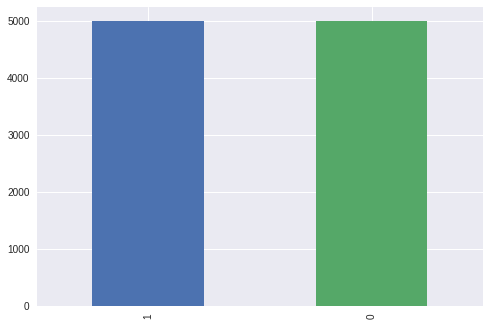

In [0]:

from __future__ import print_function, division

import numpy as np
import random
import os
import glob
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

from scipy.misc import imresize, imsave

from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense, BatchNormalization
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator


path = "/content/gdrive/My Drive/cnn_class/train_set"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('1')
    elif category == 'cat':
        categories.append('0')
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})
print(categories)

df['category'].value_counts().plot.bar()
print(df)





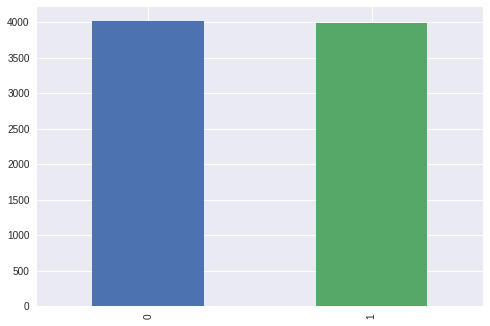

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

total_train = train_df.shape[0] #the number of images in the training df
total_validate = validate_df.shape[0]  #the number of images in the validate df
batch_size=42




In [0]:
IMAGE_WIDTH=96
IMAGE_HEIGHT=96
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/gdrive/My Drive/cnn_class/train_set", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

src="filename"
des="category"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/gdrive/My Drive/cnn_class/train_set/", 
    x_col=src,
    y_col=des,
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 45, 45, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 30976)             0         
__________

Found 1 images belonging to 1 classes.


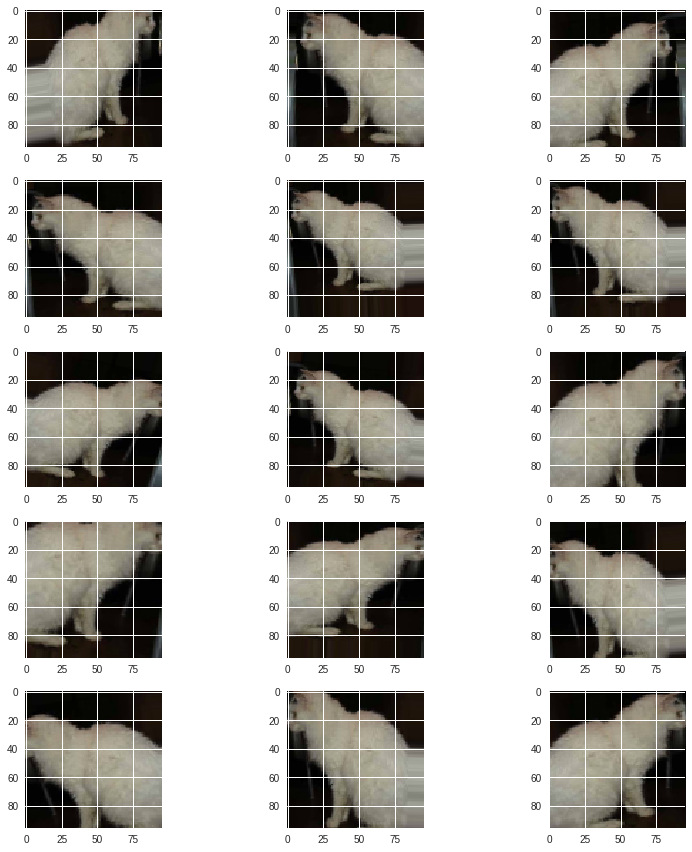

In [0]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/gdrive/My Drive/cnn_class/train_set", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Epoch 1/25
190/190 [==============================] - 3371s 18s/step - loss: 5.3485 - acc: 0.5950 - val_loss: 5.4128 - val_acc: 0.5927
Epoch 2/25
190/190 [==============================] - 85s 450ms/step - loss: 2.4830 - acc: 0.6184 - val_loss: 0.7041 - val_acc: 0.5490
Epoch 3/25
190/190 [==============================] - 82s 430ms/step - loss: 0.6426 - acc: 0.6419 - val_loss: 0.7862 - val_acc: 0.6180
Epoch 4/25
190/190 [==============================] - 73s 387ms/step - loss: 0.6180 - acc: 0.6632 - val_loss: 0.5730 - val_acc: 0.7094
Epoch 5/25
190/190 [==============================] - 80s 420ms/step - loss: 0.5844 - acc: 0.6842 - val_loss: 0.5687 - val_acc: 0.7191
Epoch 6/25
190/190 [==============================] - 76s 401ms/step - loss: 0.5693 - acc: 0.7047 - val_loss: 0.5508 - val_acc: 0.7058
Epoch 7/25
190/190 [==============================] - 75s 393ms/step - loss: 0.5651 - acc: 0.7062 - val_loss: 0.5297 - val_acc: 0.7186

Epoch 00007: ReduceLROnPlateau reducing learning rate 

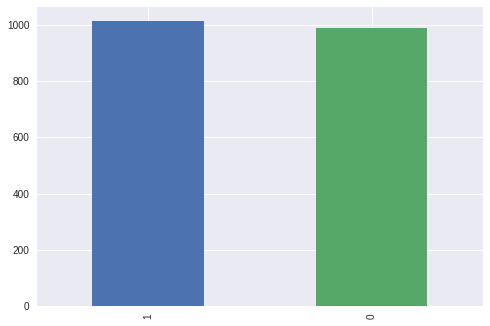

In [0]:
validate_df['category'].value_counts().plot.bar()


earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]



history = model.fit_generator(
    train_generator, 
    epochs=25,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [0]:
model.save_weights('model_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())
    

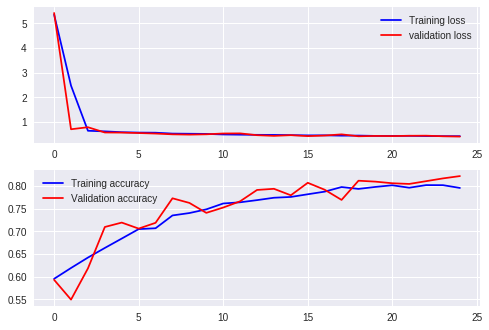

In [0]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [69]:
import numpy as np
from keras.preprocessing import image
path = "/content/gdrive/My Drive/cnn_class/test_set"
files = os.listdir(path)
test_image=image.load_img(path+'/'+files[4999],target_size=IMAGE_SIZE)

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
if result[0][0]==1:
  prediction='dog'
else:
  prediction='cat'
print(prediction)

dog


In [0]:
import os
import numpy as np
from keras.preprocessing import image

path = "/content/gdrive/My Drive/cnn_class/test_set"
files = os.listdir(path)
test_image_set=[]
for e in range(0,500):
  test_image=image.load_img(path+'/'+files[e],target_size=IMAGE_SIZE)
  test_image_set.append(test_image)

  
prediction=[]
for e in test_image_set:
  test_image=image.img_to_array(e)
  test_image=np.expand_dims(test_image,axis=0)
  result=model.predict(test_image)
  if result[0][0]==1:
    prediction.append('dog')
  else:
    prediction.append('cat')
    
print(prediction)

['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog'

In [68]:
cnt=[]
for e in prediction:
  if e=="dog":
    cnt.append(1)
  else:
    cnt.append(0)
print(cnt.count(1)//cnt.count(0))

2
